In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
for x in df.columns:
    print(x , '=>', len(df[x].unique()))

USMER => 2
MEDICAL_UNIT => 13
SEX => 2
PATIENT_TYPE => 2
DATE_DIED => 401
INTUBED => 4
PNEUMONIA => 3
AGE => 121
PREGNANT => 4
DIABETES => 3
COPD => 3
ASTHMA => 3
INMSUPR => 3
HIPERTENSION => 3
OTHER_DISEASE => 3
CARDIOVASCULAR => 3
OBESITY => 3
RENAL_CHRONIC => 3
TOBACCO => 3
CLASIFFICATION_FINAL => 7
ICU => 4


In [6]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

# Data Preprocessing

### Getting rid of the missing values of features except "INTUBED", "PREGNANT", "ICU"


In [7]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

### Preaparing "DATE_DIED" column

In [8]:
# If we have "9999-99-99" values that means this patient is alive.

df['DEATH'] = [2 if x == '9999-99-99' else 1 for x in df.DATE_DIED]

### Pregnant-Sex Bar Plot

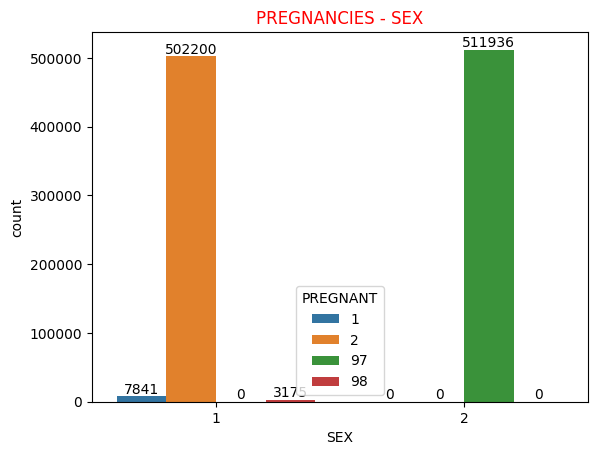

In [9]:
plt.figure()
ax = sns.countplot(x= df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

In [10]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

### Missing value analysis of "INTUBED" feature

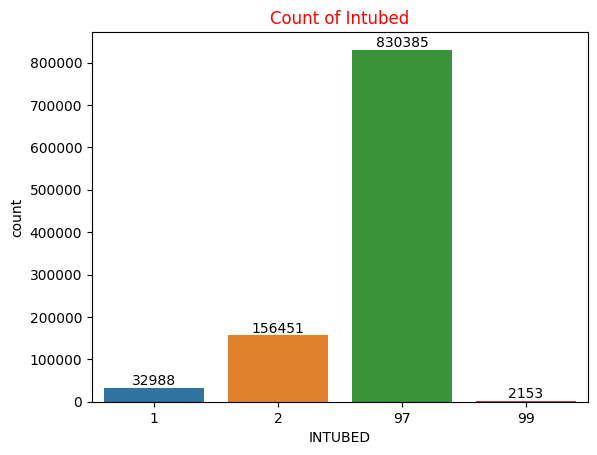

In [11]:
ax = sns.countplot(x = df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

### Missing value analysis of "ICU" feature

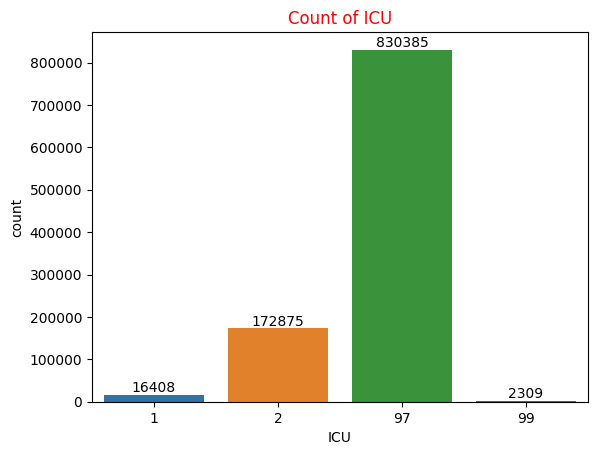

In [12]:
ax = sns.countplot(x = df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

### Dropping useless columns

In [13]:
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

# Co-relation Heatmap

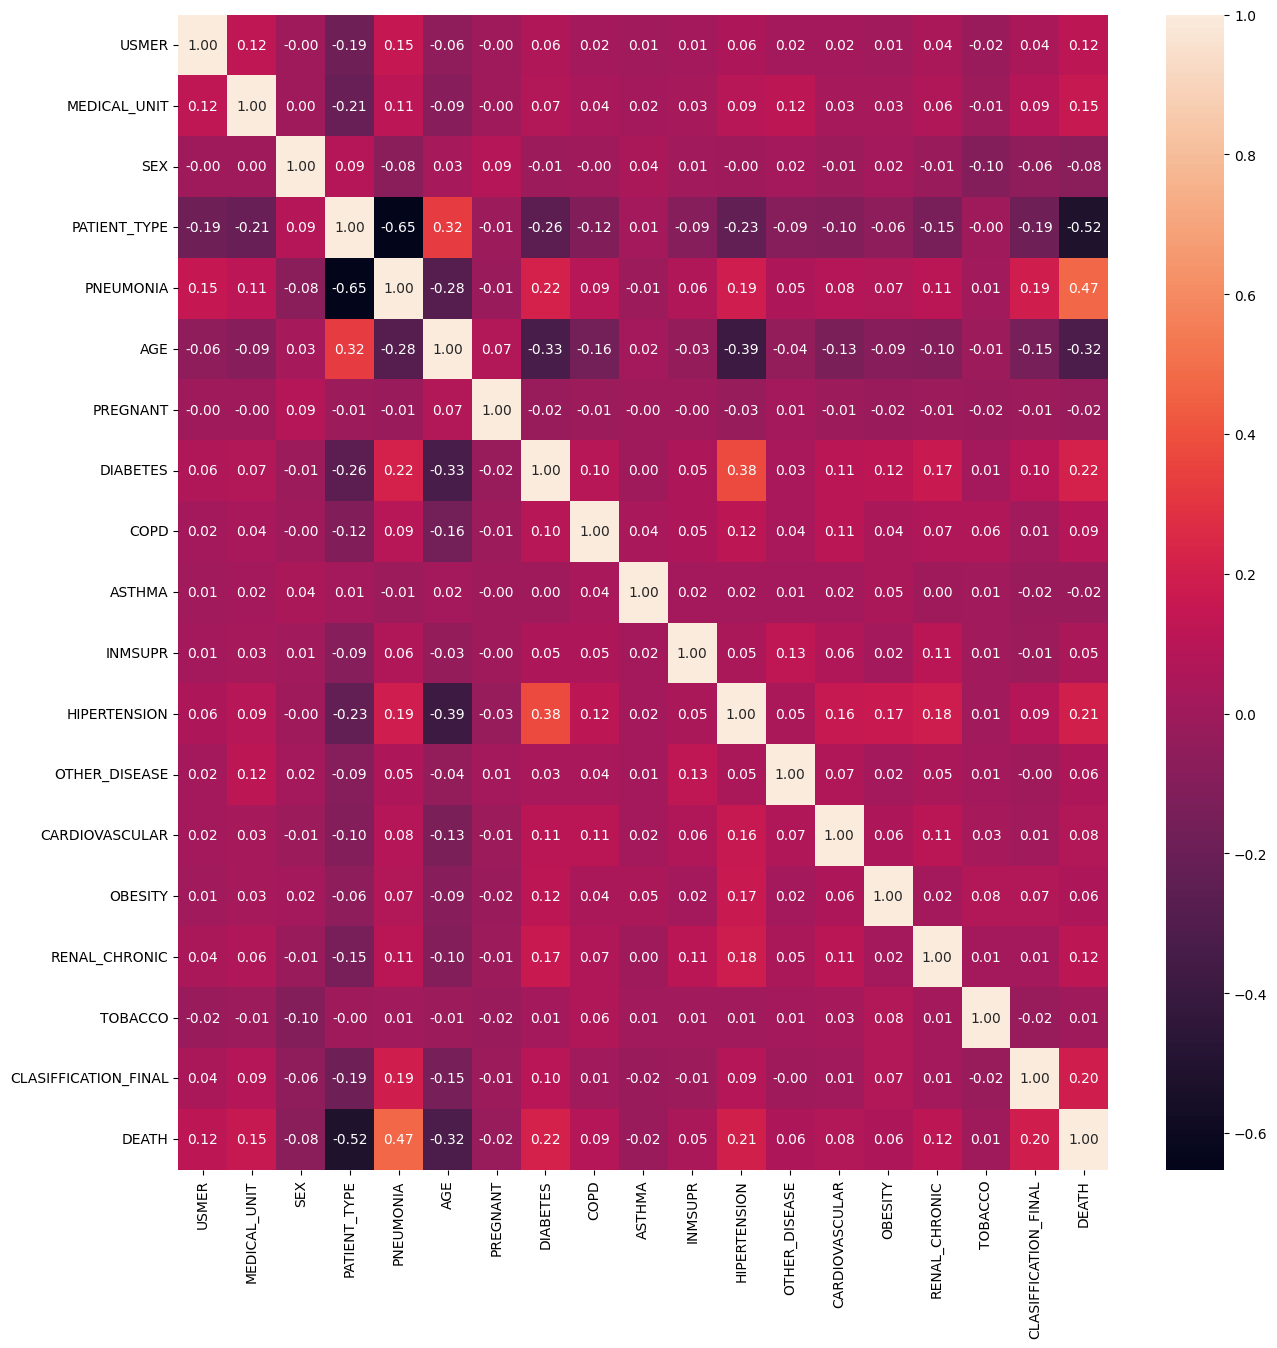

In [14]:
plt.figure(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f");

# Feature Selection

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(df.drop('DEATH', axis=1), df['DEATH'])

ExtraTreesClassifier()

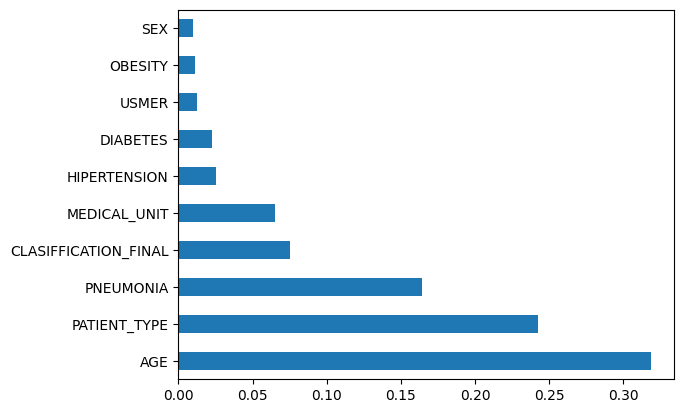

In [16]:
# Use inbuilt class feature_importances
feat_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])

# Plotting the feature importances
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
# Get the top 10 features
top_10_features = feat_importances.nlargest(10).index

# Filter the dataframe to keep only the top 10 features
df_new = df[top_10_features]

# Optionally, include your target variable back if needed
df_new['DEATH'] = df['DEATH']

In [18]:
for x in df_new.columns:
    print(x , '=>', len(df_new[x].unique()))

AGE => 121
PATIENT_TYPE => 2
PNEUMONIA => 2
CLASIFFICATION_FINAL => 7
MEDICAL_UNIT => 13
HIPERTENSION => 2
DIABETES => 2
USMER => 2
OBESITY => 2
SEX => 2
DEATH => 2


### Preparing the categorical features which are not binary


In [19]:
# Assuming df_new is your original DataFrame
df = pd.get_dummies(df_new, columns=["MEDICAL_UNIT", "CLASIFFICATION_FINAL"], drop_first=True)

# Convert TRUE/FALSE to 1/0 if needed
df = df.astype(int)

# Display the first few rows of the dataframe
df.head()

,AGE,PATIENT_TYPE,PNEUMONIA,HIPERTENSION,DIABETES,USMER,OBESITY,SEX,DEATH,MEDICAL_UNIT_2,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,65,1,1,1,2,2,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,72,1,1,1,2,2,1,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,55,2,2,2,1,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,1,2,2,2,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,68,1,2,1,1,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0


### Scaling the numeric features

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

# Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(columns="DEATH")
y = df["DEATH"]

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 26)
Test_x : (204396, 26)
Train_y : (817581,)
Test_y : (204396,)


# Linear Regression

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)
print("Logistic Regression Accuracy :",model.score(test_x, test_y))

Logistic Regression Accuracy : 0.9401896318910351


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1021977 non-null  float64
 1   PATIENT_TYPE            1021977 non-null  int64  
 2   PNEUMONIA               1021977 non-null  int64  
 3   HIPERTENSION            1021977 non-null  int64  
 4   DIABETES                1021977 non-null  int64  
 5   USMER                   1021977 non-null  int64  
 6   OBESITY                 1021977 non-null  int64  
 7   SEX                     1021977 non-null  int64  
 8   DEATH                   1021977 non-null  int64  
 9   MEDICAL_UNIT_2          1021977 non-null  int64  
 10  MEDICAL_UNIT_3          1021977 non-null  int64  
 11  MEDICAL_UNIT_4          1021977 non-null  int64  
 12  MEDICAL_UNIT_5          1021977 non-null  int64  
 13  MEDICAL_UNIT_6          1021977 non-null  int64  
 14  MEDICAL